# SOK-1006 v23
## Innleveringsoppgave 2
### Analyse av en merverdiavgift ("ad valorem tax")

Her skal vi se på virkningen av å ilegge en vare en skatt i henhold til dens verdi (merverdiavgift). Betrakt fremstillingen av markedet for oppdrettslaks i læreboka s. 101-104. Etterspørsel er gitt ved


\begin{equation}
   x^{D}= 500 -3.2p_k\tag{1}
\end{equation}

og tilbud:


\begin{equation}
   x^{S}= -100 + 4.3p_s\tag{2}
\end{equation}

Kjøpere betaler $p_k$ og selgere får $p_s$. Prisen som selgere får er det som konsumenter betaler minus mva $tp_k$, noe som betyr at $p_s=(1-t)p_k$. Her er $1>t\geq 0$ avgiftssatsen. Vi kan skrive (2) også som en funksjon på prisen som konsumenten betaler:

\begin{equation}
   x^{S}= -100 + 4.3 p_k(1-t)\tag{3}
\end{equation}



In [539]:
# importer pakkene
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

In [540]:
# Etterspørsel i likning (1)

def x_d(p,T):
    return 500 - 3.2*p*(1+T)

#Tilbud i likning (3)

def x_s(p,t):
    return -100+4.3*p*(1-t)


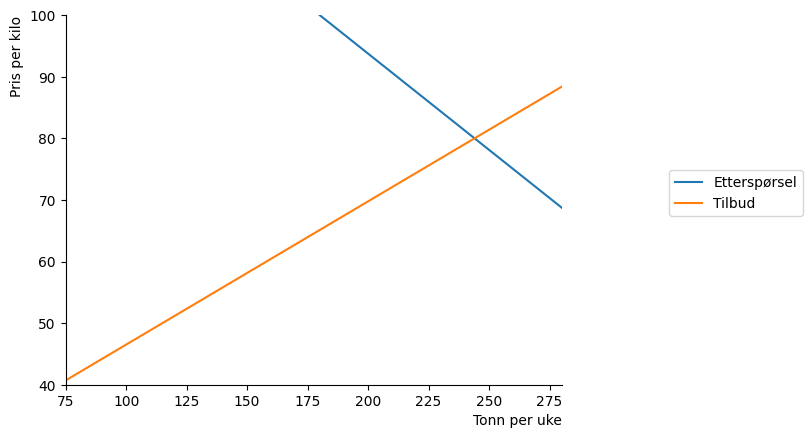

In [541]:
# vi lager en basisfigur

p_num=np.linspace(0.1,100,100)

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris per kilo', loc='top')
                ax.set_xlabel('Tonn per uke', loc='right')
                ax.set(xlim=(75,280))
                ax.set(ylim=(40,100))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

# plott funksjonene

ax.plot(x_d(p_num, 0),p_num, label='Etterspørsel')

ax.plot(x_s(p_num, 0),p_num, label='Tilbud')

ax.legend(bbox_to_anchor=(1.5,0.6));

   
1. Tegn inn tilbudsfunksjon med 25% mva, og forklar hvorfor denne har brattere helning enn tilbudsfunksjon uten mva (t=0).

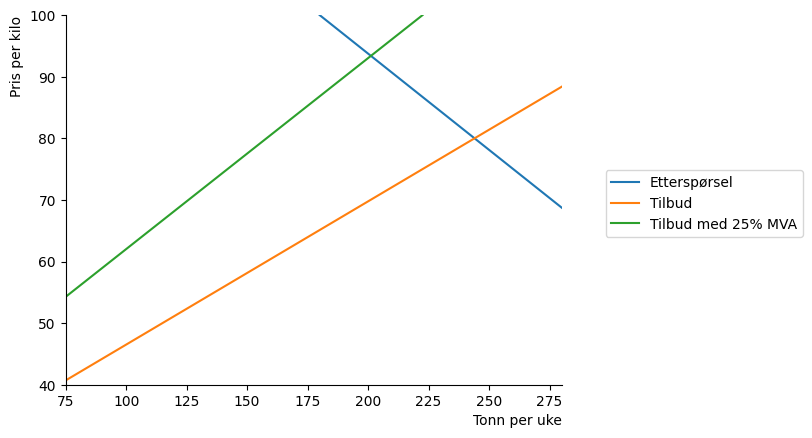

In [542]:
fig, ax = create_ax()

# plott funksjonene

ax.plot(x_d(p_num, 0),p_num, label='Etterspørsel')

ax.plot(x_s(p_num, 0),p_num, label='Tilbud')

ax.plot(x_s(p_num, 0.25),p_num, label='Tilbud med 25% MVA')

ax.legend(bbox_to_anchor=(1.5,0.6));

# Den grønne linjen er brattere fordi når prisen er høyere så er 75%. Det er på grunn av den prosentvise avgiften at du får en endring i tilbudskurven.

   
2. Beregn likevektspris og -kvantum med og uten mva, og vis disse i figuren.

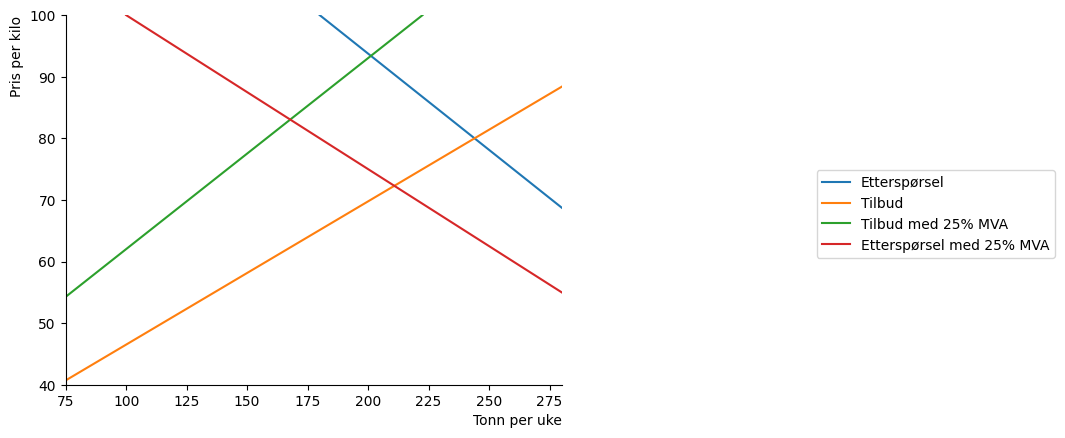

In [543]:
fig, ax = create_ax()

# plott funksjonene

ax.plot(x_d(p_num, 0),p_num, label='Etterspørsel')

ax.plot(x_s(p_num, 0),p_num, label='Tilbud')

ax.plot(x_s(p_num, 0.25),p_num, label='Tilbud med 25% MVA')

ax.plot(x_d(p_num, 0.25),p_num, label='Etterspørsel med 25% MVA')

ax.legend(bbox_to_anchor=(1.5,0.6));

In [544]:
# definer symboler i sympy

x,p,t,T=sp.symbols('x p t T', positive=True, real=True)

# betingelse for likevekt

eq_cond=sp.Eq(x_d(p,T),x_s(p,t))
eq_cond

Eq(-3.2*p*(T + 1) + 500, 4.3*p*(1 - t) - 100)

In [545]:
# løs for p
p_eq=sp.solve(eq_cond,p)
p_eq[0]

6000.0/(32.0*T - 43.0*t + 75.0)

In [546]:
# finn tilsvarende kvantum
x_eq=x_s(p_eq[0],t)
x_eq

25800.0*(1 - t)/(32.0*T - 43.0*t + 75.0) - 100

In [547]:
p_eq_fn=sp.lambdify(
    (t,T), 
    p_eq[0]
)

p_eq_fn(t,T)

lol=np.round(p_eq_fn(0.25,0.25))
lol2=np.round(p_eq_fn(0,0.25))
lol3=np.round(p_eq_fn(0.25,0))
lol4=np.round(p_eq_fn(0,0))


In [548]:
# Likevektskvantum som funksjon av t og T

x_eq_fn=sp.lambdify(
    (t,T), 
    x_eq
)

x_eq_fn(t,T)

(25800.0 - 25800.0*t)/(32.0*T - 43.0*t + 75.0) - 100

In [549]:
lol5=np.round(x_eq_fn(0.25,0.25))
lol6=np.round(x_eq_fn(0,0.25))
lol7=np.round(x_eq_fn(0.25,0))
lol8=x_eq_fn(0,0)

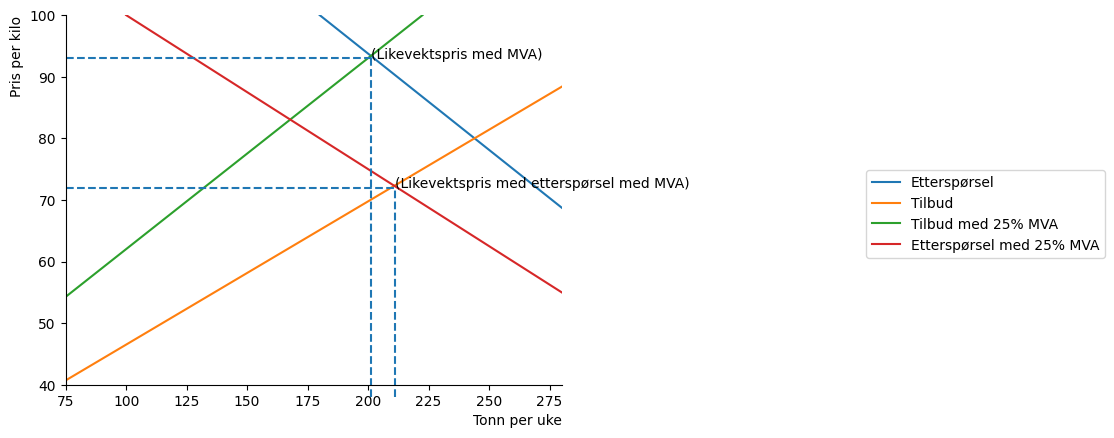

In [550]:
# sett inn linjer som viser likevekten
# clip_on=False for å tegne utenfor plottområdet

ax.vlines(lol7,38,lol3, linestyles='dashed', clip_on=False)
ax.hlines(lol3,75,lol7, linestyles='dashed', clip_on=False)
ax.vlines(lol6,38,lol2, linestyles='dashed', clip_on=False)
ax.hlines(lol2,75,lol6, linestyles='dashed', clip_on=False)


# sett inn likevektsverdier i figuren
ax.annotate(f'(Likevektspris med MVA)', (lol7-10, lol3-10), xytext=(lol7, lol3))
ax.annotate(f'(Likevektspris med etterspørsel med MVA)', (lol6-10, lol2-10), xytext=(lol6, lol2))


ax.legend(bbox_to_anchor=(1.6,0.6))
fig

   
3. Beregn og vis inntekten til staten, og andelen som betales av konsumenter og produsenter.

In [580]:
p_0 = p_eq_fn(0,0)
p1 = p_eq_fn(0.25,0)
p2 = p_eq_fn(0,0.25)
p3 = p1-p_0
konsum= p3/21
konsumentensandel = konsum*100

f'''Statens inntekt er {np.round(p1-p2)}%, andelen som betales av konsumenter er {konsumentensandel}% og produsentens andel er {100-konsumentensandel}%'''

'Statens inntekt er 21.0%, andelen som betales av konsumenter er 63.73911432277188% og produsentens andel er 36.26088567722812%'

   
4. Hva er fordeler/ulemper av en mva og en stykkprisavgift?

Fordelen med stykkprisavgift er at staten får mer makt over konsumentenes forbruk, og ulempene det samme.